# Генеративная модель на основе гауссовых смесей

Гауссовы смеси — естественное математическое обобщение алгоритма `K-means`. По сути, подход ищет не просто какие-то кучки вокруг формирующихся центроидов, а некоторую смесь многомерных нормальных распределений (по сути — тоже кучки вокруг средних со своими дисперсиями). Так как такой подход оценивает плотности распределений, то он часто используется в задачах KDE (kernel density estimation). В том числе, он может быть применен к задаче генерации: если есть плотность распределения, то можно семплировать и получать новые объекты. Давайте посмотрим на простейший пример решения такой задачи.

Работать будем опять-таки с `MNIST`. Так как модель оказывается крайне тяжеловесной, будем использовать «простой» набор данных. Визуализируем элементы этого набора данных (для наглядности)

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

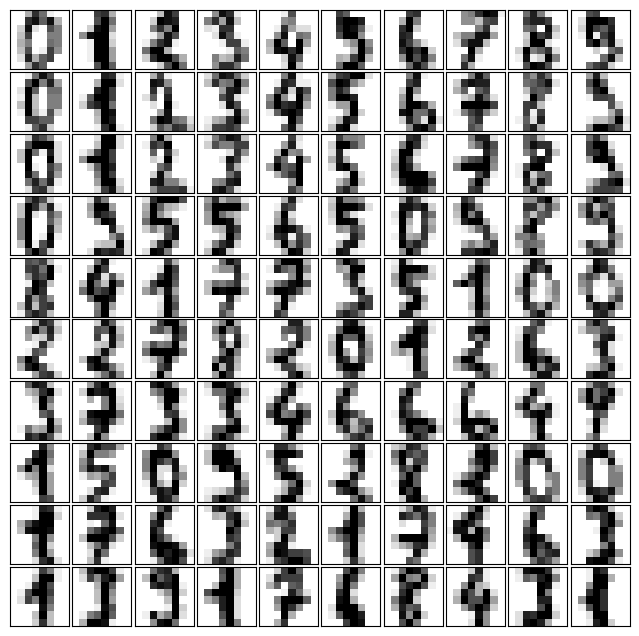

In [2]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

Для того, чтобы обучение проходило быстрее имеет смысл снизить размерность пространства признаков. Произведите преобразования для всего набора данных помощи <code>PCA(n_components=0.99, svd_solver=='full')</code>.


In [20]:
from sklearn.decomposition import PCA
import numpy as np

# Предположим, что у вас есть данные в виде матрицы X, где каждая строка - это объект, а каждый столбец - признак

# Создаем объект PCA с сохранением 99% дисперсии
pca = PCA(n_components=0.99, svd_solver='full')

# Обучаем модель PCA на данных
pca.fit(digits.data)

# Преобразуем данные в новое пространство признаков
X_reduced = pca.transform(digits.data)

Введите число полученных ГК

In [21]:
pca.n_components_

41

Обучим интересующую нас модель, подобрав гиперпараметр, отвечающий за число используемых компонент, минимизируя <a href="https://ru.wikipedia.org/wiki/Информационный_критерий_Акаике">информационный критерий Акаике</a>.

Для значений параметра <code>n_components</code> в диапазоне $[50,250)$ с шагом $10$ обучите модели <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html"><code>GaussianMixture</code></a> с параметрами, указанными в вашем задании. При помоши метода <code>.aic()</code> вычислите значение критерия каждой модели.

Введите значение <code>n_components</code> модели с наименьшим значением критерия Акаике.




In [22]:
from sklearn.mixture import GaussianMixture
import numpy as np

import pandas as pd

# Создадим список для хранения результатов
aic_scores = []
n_components_range = range(50, 250, 10)

for n_components in n_components_range:
    # Создаем и обучаем модель
    gmm = GaussianMixture(n_components=n_components,covariance_type='full', random_state=7)
    gmm.fit(X_reduced)

    # Вычисляем AIC
    aic = gmm.aic(X_reduced)
    aic_scores.append(aic)

# Создадим DataFrame для удобства анализа
results = pd.DataFrame({'n_components': n_components_range, 'AIC': aic_scores})

# Найдем модель с минимальным AIC
best_n_components = results.loc[results['AIC'].idxmin(), 'n_components']

print("Оптимальное число компонент:", best_n_components)

Оптимальное число компонент: 180


Обучите финальную модель на подобранном гиперпараметре. Проверьте, что обучение сошлось (поле <code>.converged_</code> модели).

In [28]:
gmm = GaussianMixture(n_components=180,covariance_type='full', random_state=7)
gmm.fit(X_reduced)

GaussianMixture(n_components=180, random_state=7)

При помощи метода <code>.sample()</code> сгенерируйте $100$ новых объектов.

Введите выборочное среднее коориднаты с индексом $0$ сгенерированных объектов.

In [29]:
# Генерация 100 новых объектов
new_samples = gmm.sample(n_samples=100)[0]

# Вычисление выборочного среднего по нулевой координате
mean_of_first_feature = np.mean(new_samples[:, 0])

print("Выборочное среднее по нулевой координате сгенерированных объектов:", mean_of_first_feature)

Выборочное среднее по нулевой координате сгенерированных объектов: -2.991547162031259


При помоши метода <code>.inverse_transform()</code> класса <code>PCA</code> верните сгенерированные объекты в пространство исходных признаков.

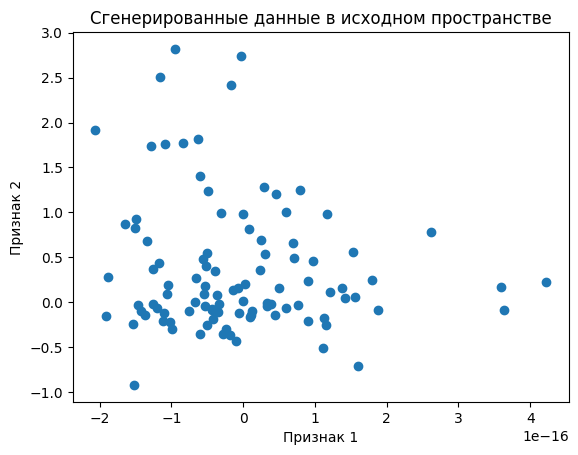

In [30]:
X_new = pca.inverse_transform(new_samples)

# Визуализация (например, для первых двух признаков)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Сгенерированные данные в исходном пространстве')
plt.show()

In [31]:
X_new.shape

(100, 64)

Визуализируйте полученные результаты. Введите номер изображения, соответствующего сгенерированному объекту с индексом $5$ (индексация начинается с нуля)

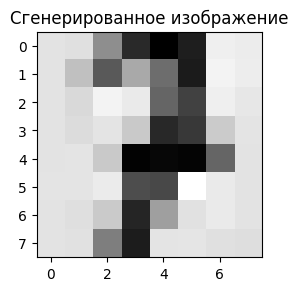

In [32]:
import matplotlib.pyplot as plt

# Выбираем изображение, соответствующее сгенерированному объекту с индексом 5
image_index = 47  # Индекс изображения в исходном наборе данных
generated_image_index = 47  # Индекс сгенерированного объекта

# Визуализируем сгенерированное изображение
plt.subplot(1, 2, 2)
plt.imshow(X_new[generated_image_index].reshape(8,8), cmap='binary')
plt.title('Сгенерированное изображение')

plt.show()